1- Random graph-

In [50]:
import networkx as nx
import random

In [51]:
graph = nx.Graph()

nb_node = 50
for i in range(nb_node):
    graph.add_node(i)

----------------------------------------------
Graph 1
Edge probability : 0.01
Number of edge : 20
g0 : 10


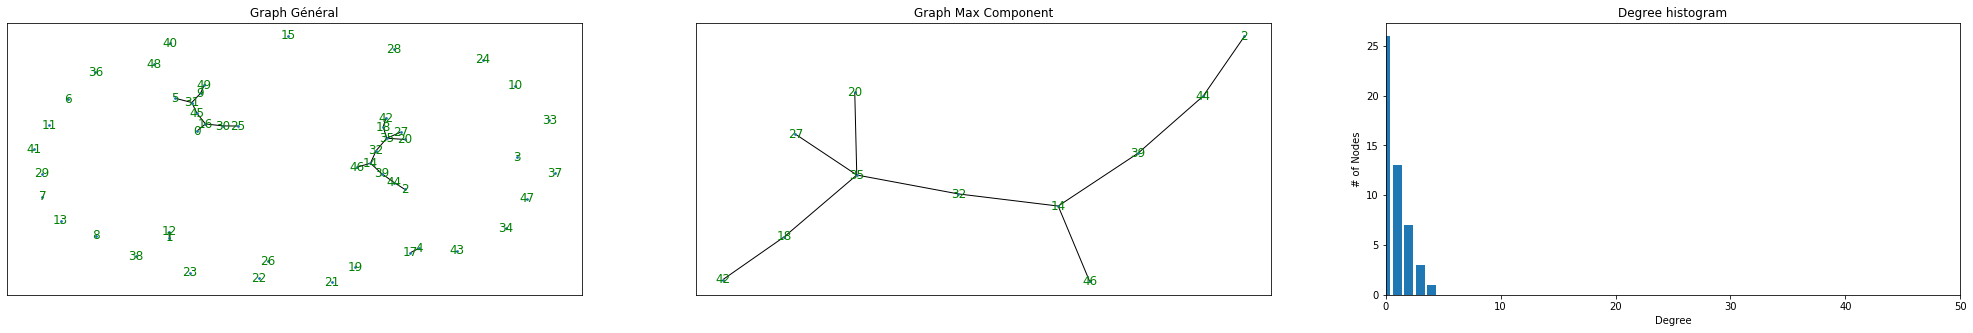

----------------------------------------------
Graph 2
Edge probability : 0.02
Number of edge : 42
g0 : 38


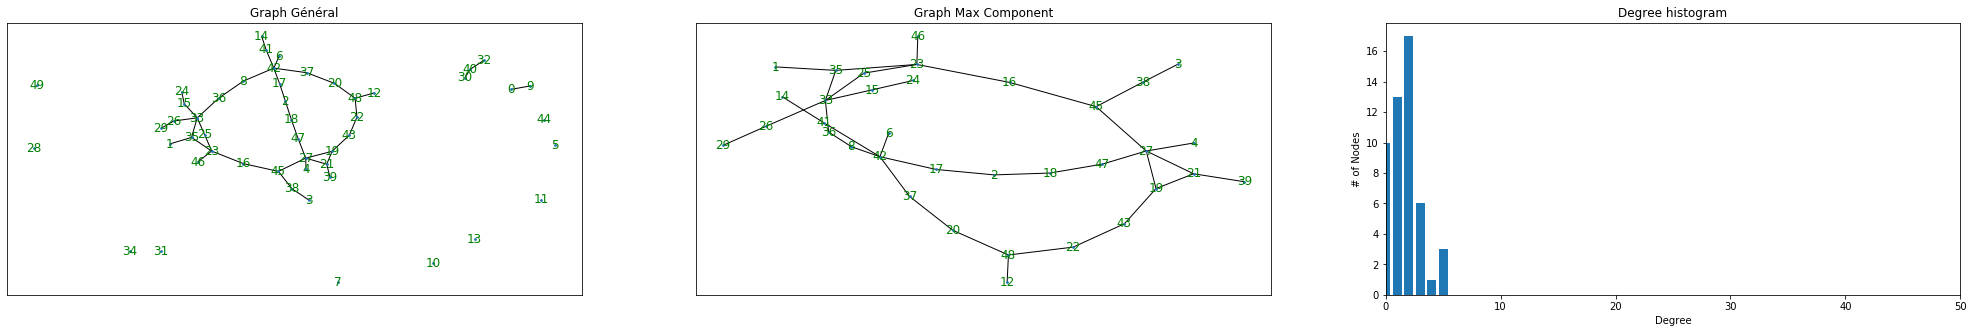

----------------------------------------------
Graph 3
Edge probability : 0.03
Number of edge : 75
g0 : 74


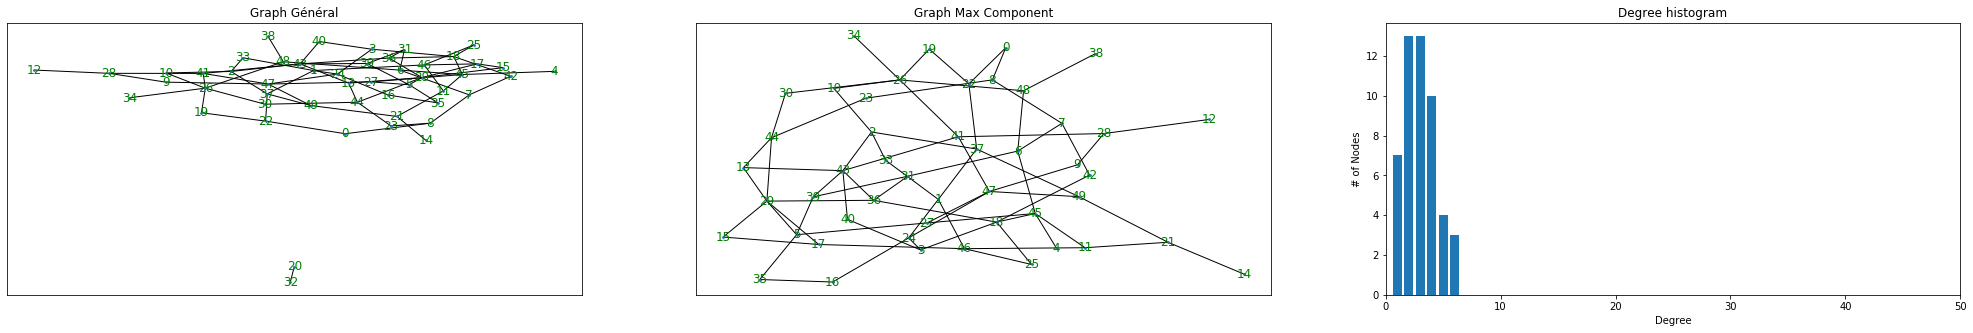

----------------------------------------------
Graph 4
Edge probability : 0.04
Number of edge : 79
g0 : 79


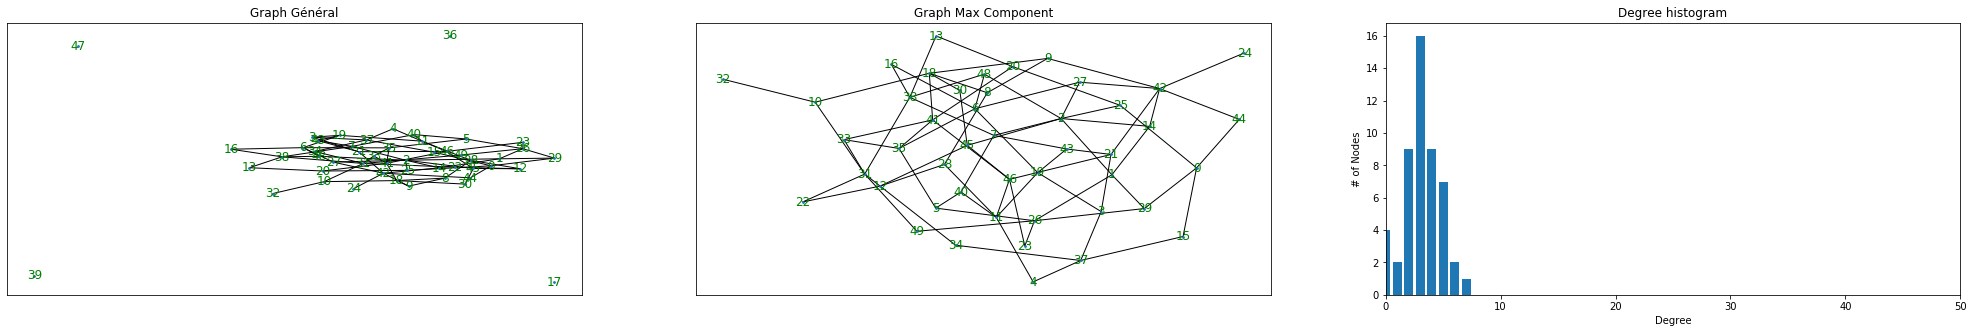

----------------------------------------------
Graph 5
Edge probability : 0.05
Number of edge : 134
g0 : 134


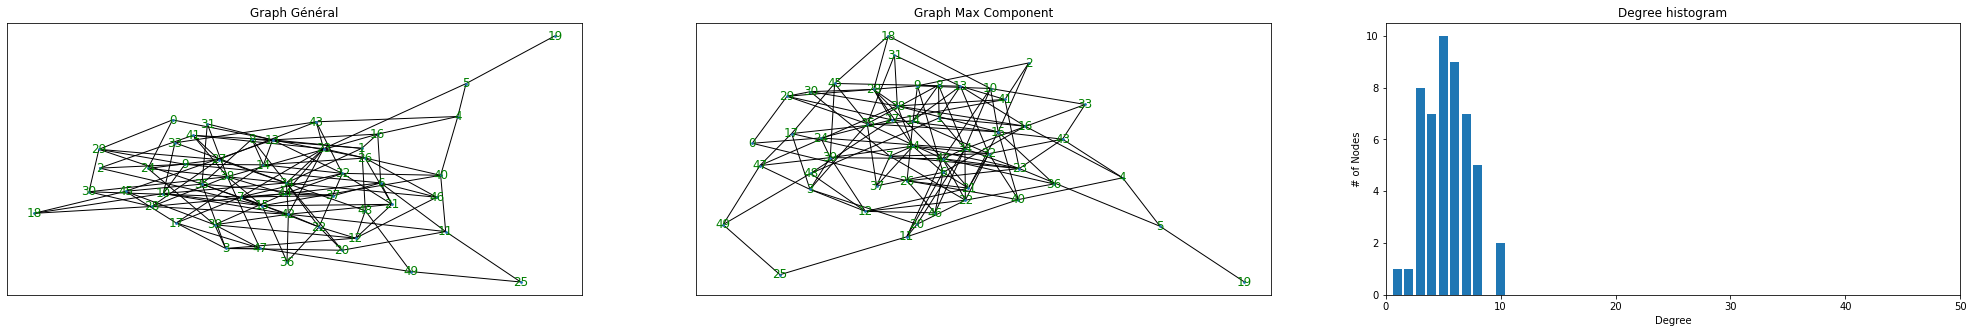

----------------------------------------------
Graph 6
Edge probability : 0.06
Number of edge : 146
g0 : 146


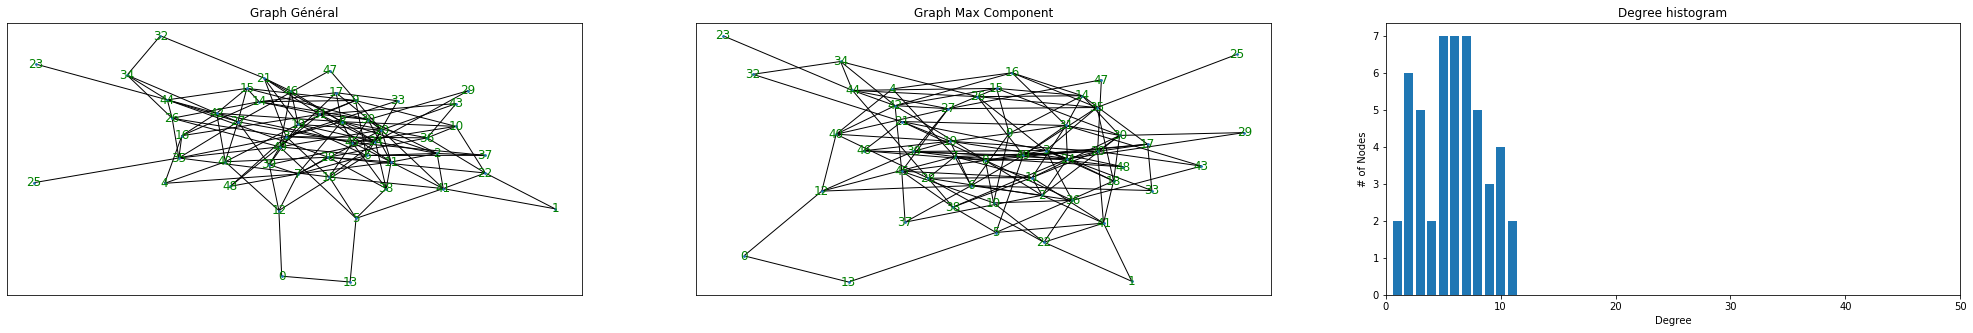

----------------------------------------------
Graph 7
Edge probability : 0.07
Number of edge : 173
g0 : 173


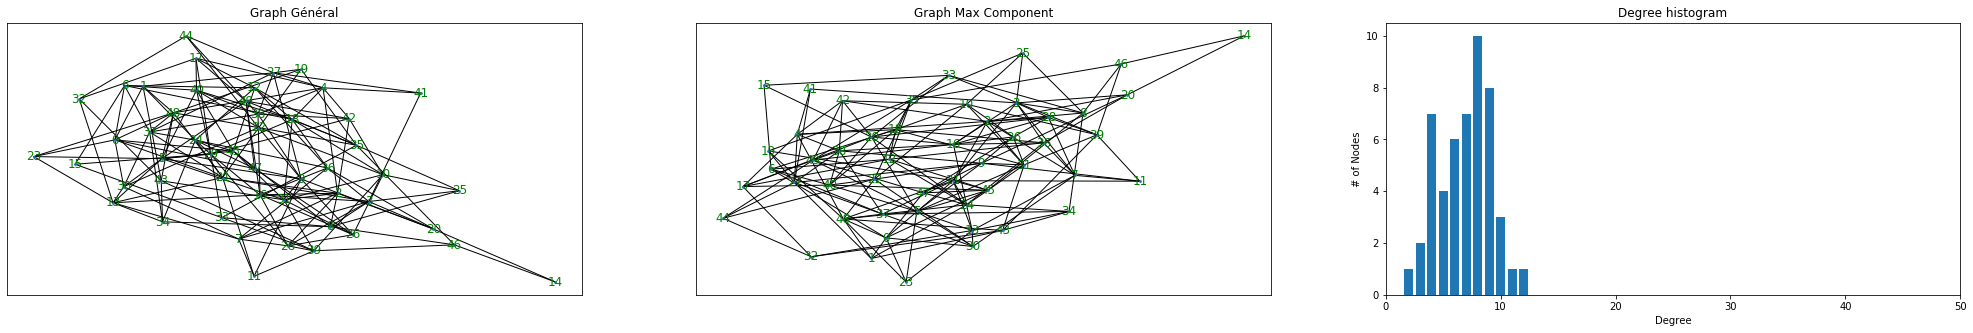

----------------------------------------------
Graph 8
Edge probability : 0.08
Number of edge : 196
g0 : 196


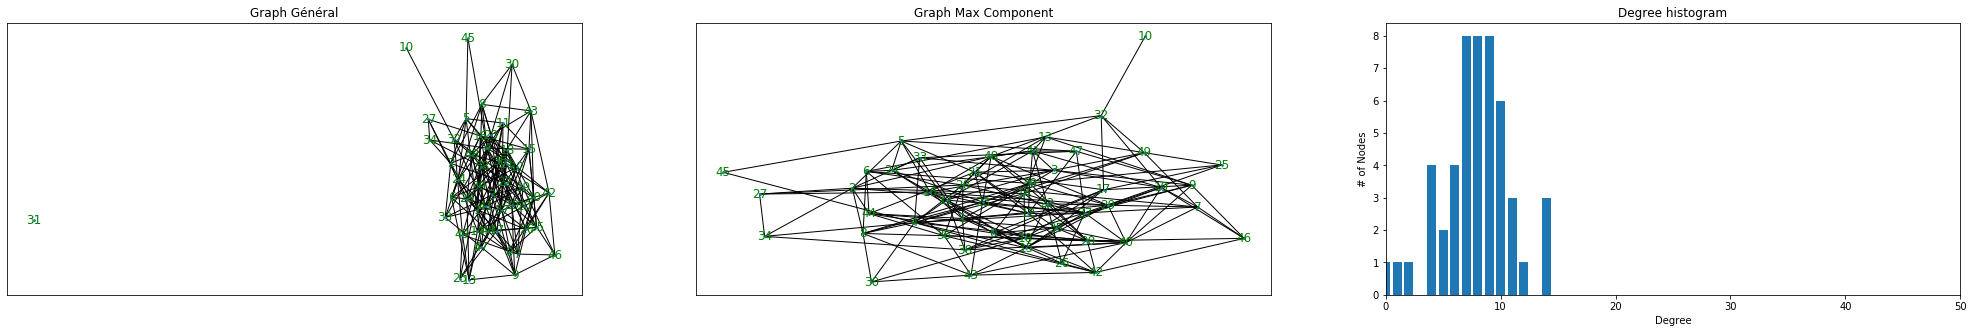

----------------------------------------------
Graph 9
Edge probability : 0.09
Number of edge : 240
g0 : 240


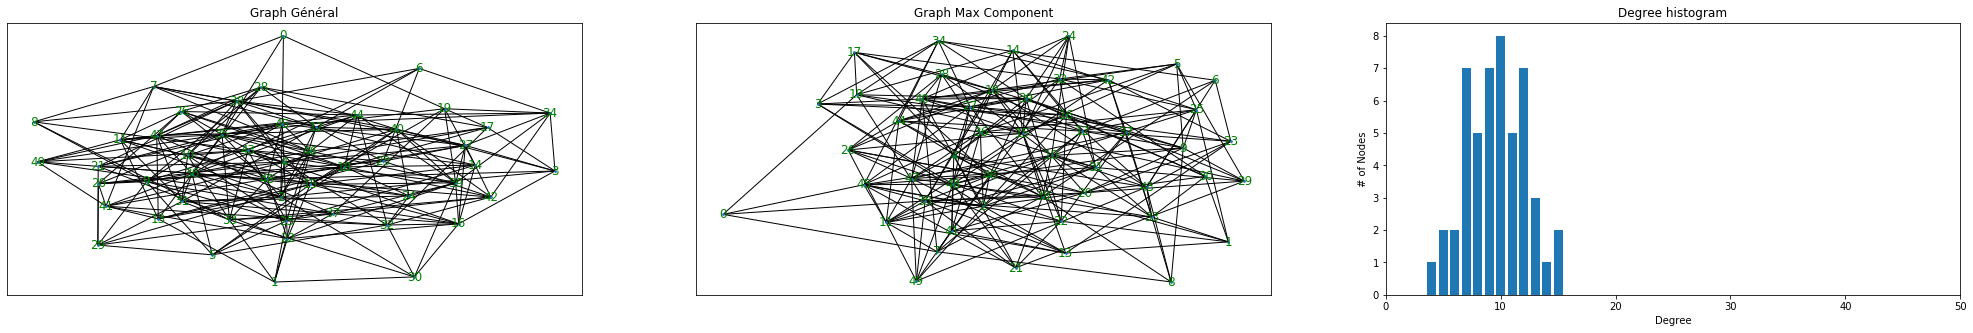

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Y = []
for i in range(1,10):
    print("----------------------------------------------")
    print("Graph", i)
    p = i/100
    graph.remove_edges_from(list(graph.edges()))
    
    print("Edge probability :", p)
    
    for n in graph.nodes:
        for j in graph.nodes:
            if random.random() <= p:
                graph.add_edge(n,j)
    print("Number of edge :", graph.number_of_edges())
    
    #nb edge du sous graph max
    Y.append(len(graph.edges()))
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    G0 = graph.subgraph(Gcc[0])
    
    print("g0 :", G0.number_of_edges()) # donne le nombre de noeuds et le nombre de edges du graph
    
    #Degree analyse
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    
    #Display
    plt.figure(figsize=(35,5))
    plt.clf()
    
    #Graph Général
    ax0 = plt.subplot(131)
    ax0.set_title("Graph Général")
    nx.draw_networkx(graph, with_labels=True, node_size=3, font_color="green")
    
    #Graph max component
    ax1 = plt.subplot(132)
    ax1.set_title("Graph Max Component")
    nx.draw_networkx(G0, with_labels=True, node_size=3, font_color="green")
    
    #Hist Degree
    ax3 = plt.subplot(133)
    ax3.set_xlim(0, nb_node)
    ax3.bar(*np.unique(degree_sequence, return_counts=True))
    ax3.set_title("Degree histogram")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("# of Nodes")
    
    plt.show()           

2-Simple graph formation game-

In [49]:
import random
from dataclasses import dataclass

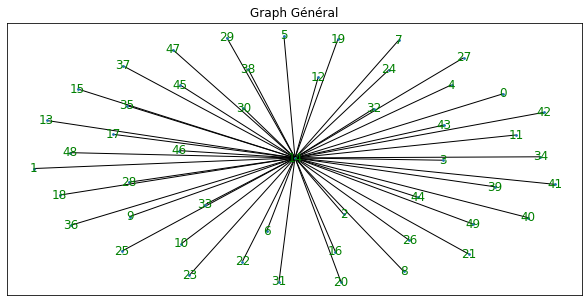

In [6]:
@dataclass
class Node:
    id:int
    value:float

nodes = []
graph = nx.Graph()
for i in range(nb_node):
    nodes.append(Node(id=i,value=0))
    graph.add_node(i)

random.shuffle(nodes)


for i in nodes:
    max_val = 0
    max_nodes = []
    for j in nodes:
        if(i != j and max_val <= j.value):
            max_val = j.value
            node = j
    if(max_val == 0):
        max_val = 1
    
    i.value = max_val
    node.value += i.value

    graph.add_edge(i.id,node.id)





plt.figure(figsize=(35,5))
plt.clf()

ax0 = plt.subplot(131)
ax0.set_title("Graph Général")
nx.draw_networkx(graph, with_labels=True, node_size=3, font_color="green")

2- Deuxième partie

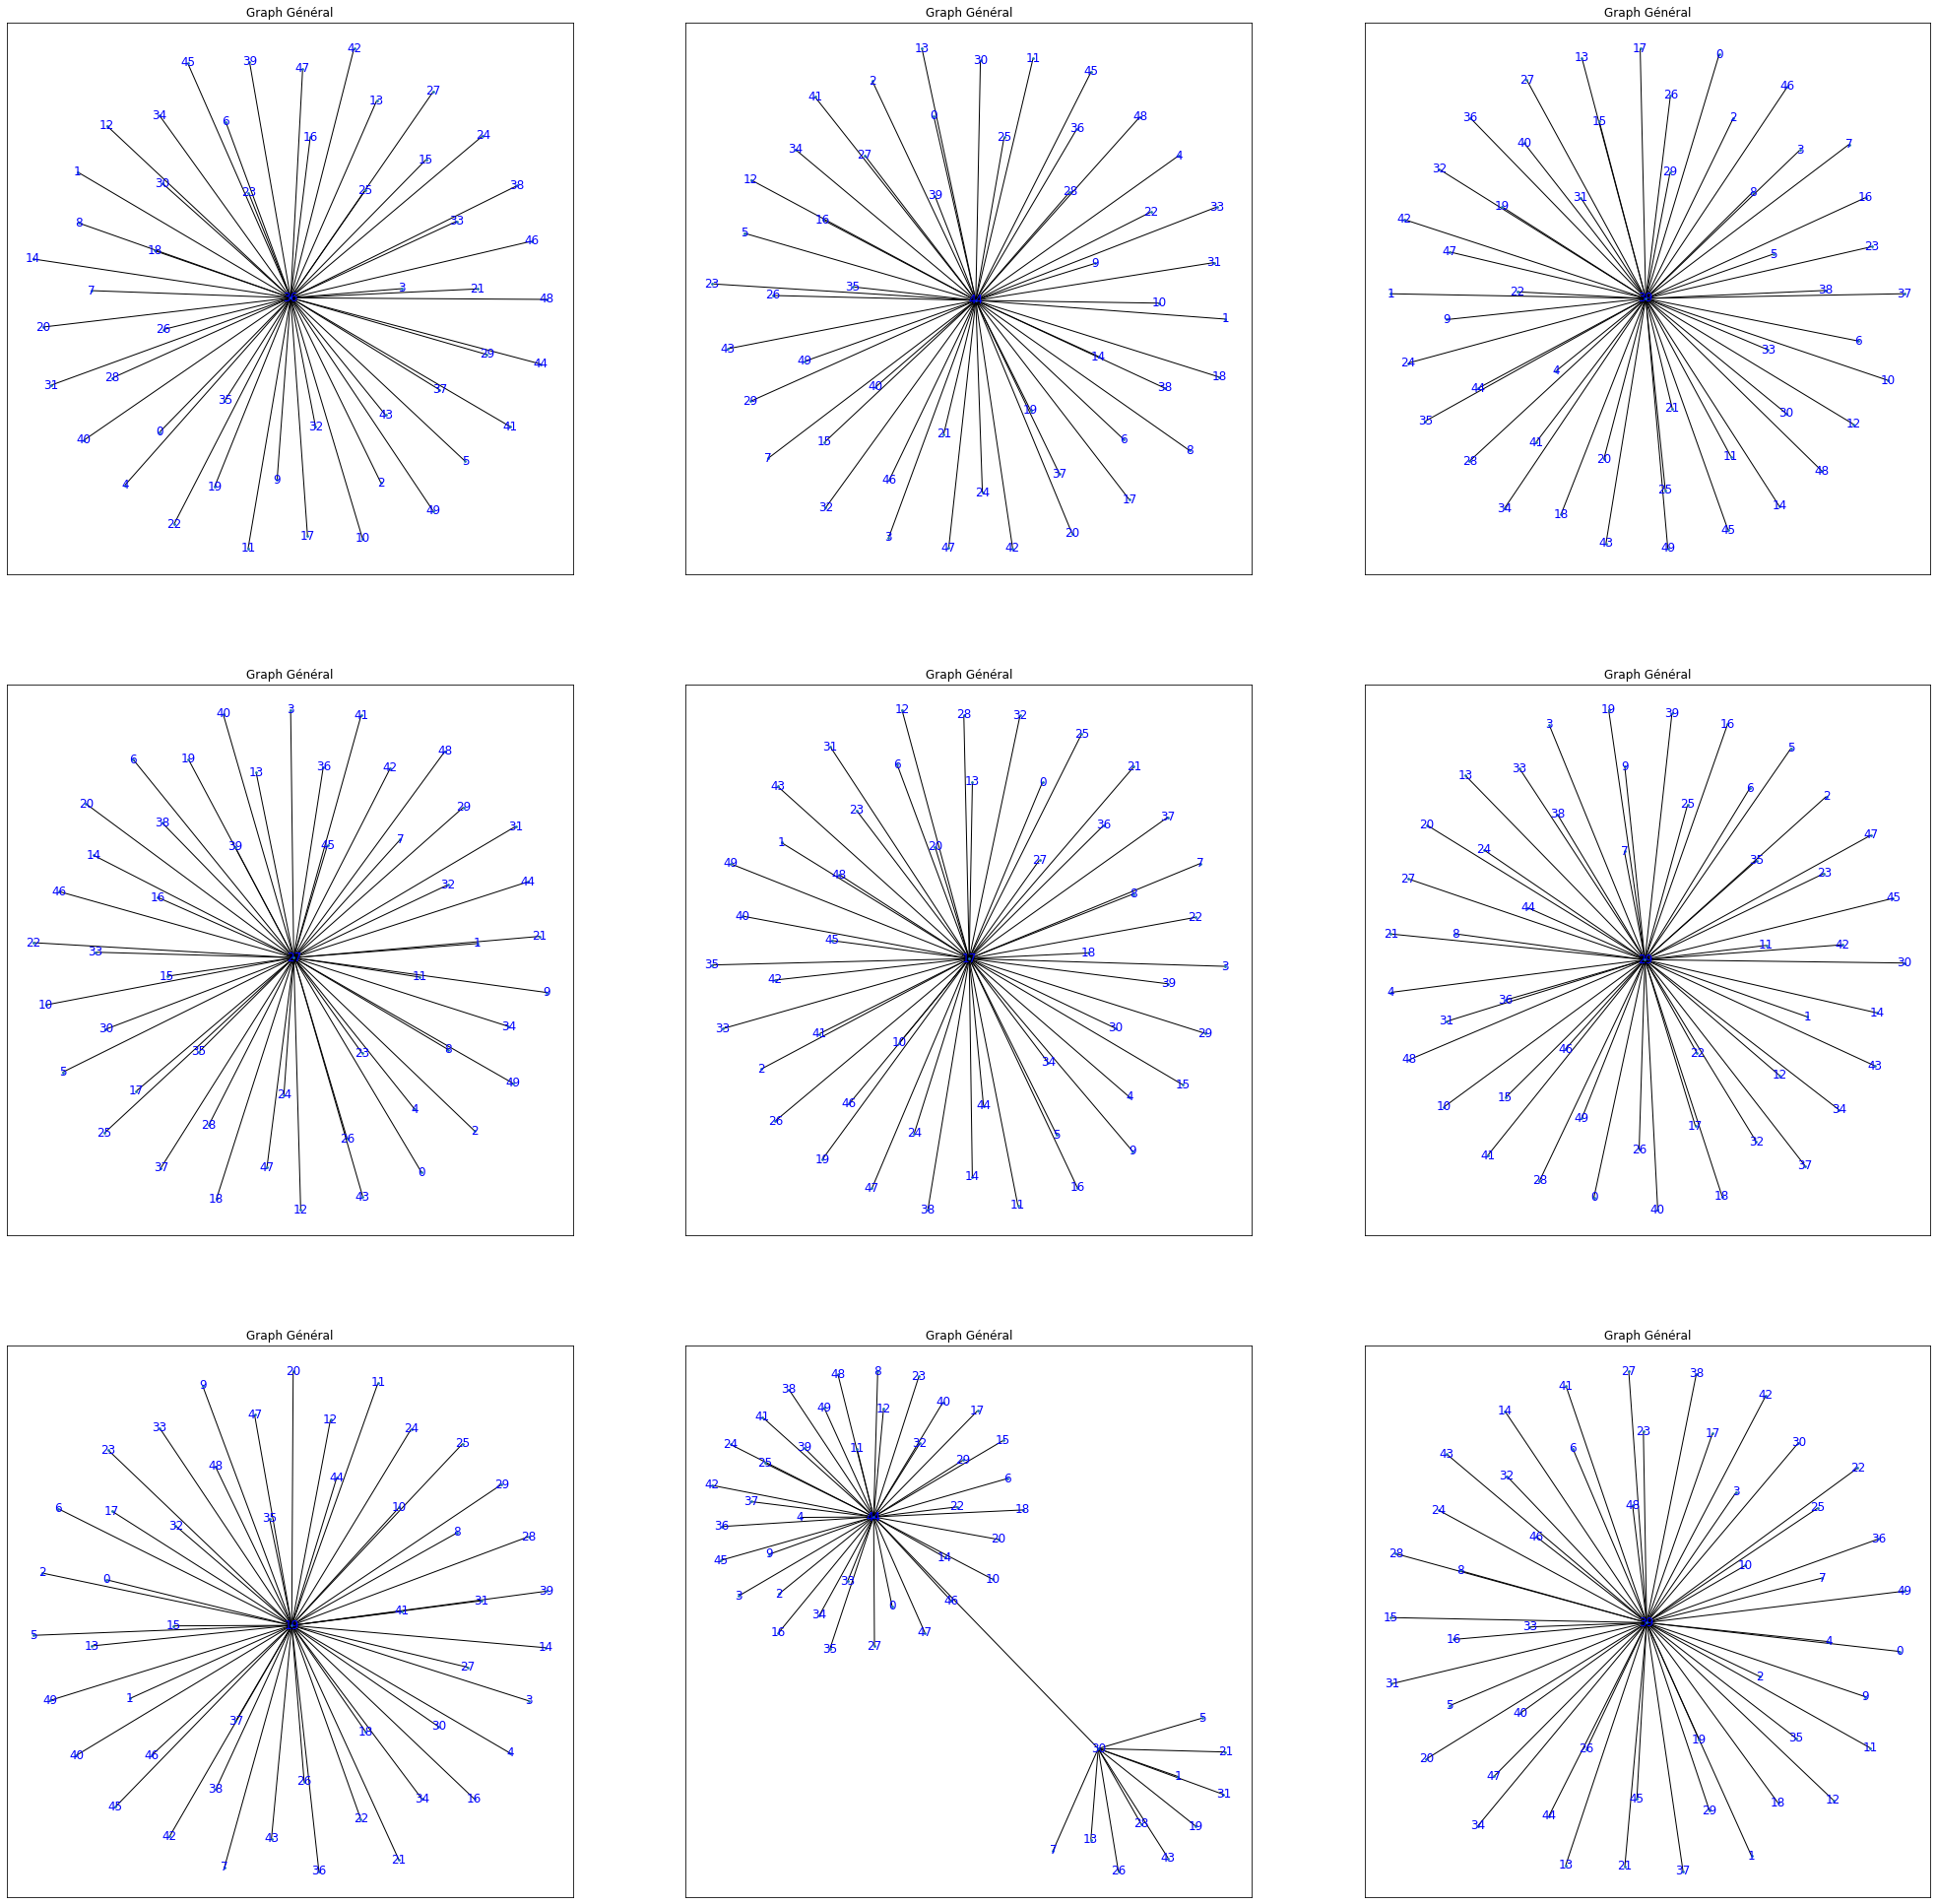

In [54]:
@dataclass
class Node:
    id:int
    value:float

plt.figure(figsize=(35,35))
plt.clf()

for k in range(9):
    nodes = []

    graph = nx.Graph()

    for i in range(nb_node):
        nodes.append(Node(id=i,value=0))
        graph.add_node(i)

    random.shuffle(nodes)
    for i in nodes:
        max_val = 0
        nodes2 = nodes.copy()
        random.shuffle(nodes2)
        for j in nodes2:
            rand = random.uniform(0.5,1.5)
            if(i != j and max_val <= rand*j.value):
                max_val = j.value
                node = j
                
        if(max_val == 0):
            max_val = 1
        
        i.value = max_val
        node.value += i.value

        graph.add_edge(i.id,node.id)


    

    ax0 = plt.subplot(3,3,k+1)
    ax0.set_title("Graph Général")
    nx.draw_networkx(graph, with_labels=True, node_size=3, font_color="blue")

3- More advanced graph formation game

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 50, 'y' with size 50.

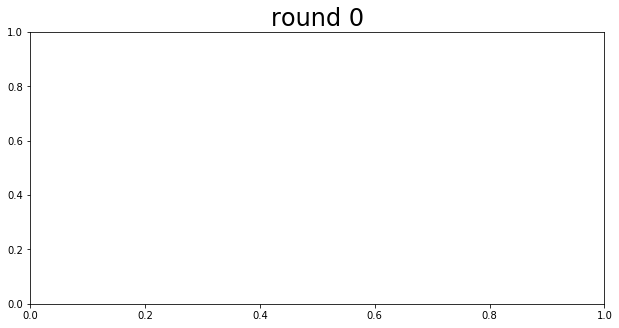

In [67]:
@dataclass
class Node:
    id:int
    value:float
    karma:float

    def __lt__(self, other):
        return self.value < other.value
    def __gt__(self, other):
        return self.value > other.value
    
nodes = []
for i in range(nb_node):
    nodes.append(Node(id=i,value=0,karma = 75))
    graph.add_node(i)

edges = []
for r in range(5):
    max_node = max(nodes)
    
    
    graph = nx.Graph()

    for n in nodes:
        graph.add_node(n.id)

    random.shuffle(nodes)
    for i in nodes:
        max_val = 0
        nodes2 = nodes.copy()
        random.shuffle(nodes2)
        for j in nodes2:
            rand = random.uniform(0.5,1.5)
            if (i != j and max_val <= rand*j.value):
                max_val = j.value
                node = j
                
        if(max_val == 0):
            max_val = 1

        if(r!=0):
            if((random.randint(0,100)>=i.karma) and i.value != 0):
                i.karma -= 10
                for e in edges:
                    if(i.id in e and max_node.id not in e):
                        edges.remove(e)
                        i.value = 0
            if(random.randint(0,100)<i.karma and i.value==0):
                    i.karma += 5
                    edges.append([i.id,max_node.id])
                    i.value = max_val
                    node.value += i.value

        else:
            edges.append([i.id,node.id])
            i.value = max_val
            node.value += i.value
    plt.figure(figsize=(35,5))
    plt.clf()

    for e in edges:
        graph.add_edge(e[0],e[1])


    ax0 = plt.subplot(1,3,1)
    ax0.set_title("round " + str(r), fontsize=24)
    nx.draw_networkx(graph, with_labels=True, node_size=300, font_color="white", node_color=["255","255","0"])

    all_karma = []
    for n in nodes:
        all_karma.append(n.karma)
    ax3.bar(*np.unique(all_karma, return_counts=True))
    ax3.set_title("Degree histogram")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("# of Nodes")